<a href="https://colab.research.google.com/github/ujjwalrajput31/excel-data-analysis-project/blob/main/Cohart_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing** **the** **libraries**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


**Importing the data**

In [2]:
subs=pd.read_excel("/content/Subscriptions_by creation date.xls")
charges=pd.read_excel("/content/Charges Processed.xls")

**Cleaning and Preparing the data**

In [3]:
subs['created_at'] = pd.to_datetime(subs['created_at'])
charges['processed_at'] = pd.to_datetime(charges['processed_at'])

subs['month'] = subs['created_at'].dt.to_period('M').astype(str)
charges['month'] = charges['processed_at'].dt.to_period('M').astype(str)

**Month-wise Revenue for Fiction Boxes (Last 3 Months)**

In [4]:
FICTION_SKU = "ABOS4FICTION|SUB"

# Filter fiction subscriptions
fiction_subs = subs[subs['sku'] == FICTION_SKU]

# Merge with charges
fiction_revenue = fiction_subs.merge(
    charges,
    left_on="subscription_id",
    right_on="line_item_subscription_id",
    how="inner"
)

fiction_revenue = fiction_revenue.dropna(subset=['month_y'])

# Last 3 months revenue
month_revenue = fiction_revenue.groupby('month_y')['total_price'].sum().reset_index()
month_revenue.columns = ['Month', 'Revenue']

# Filter out rows where 'Month' is 'NaT' string
month_revenue = month_revenue[month_revenue['Month'] != 'NaT']

month_revenue.tail(3)

,Month,Revenue
0,2025-10,186.15
1,2025-11,222.69
2,2025-12,474.79


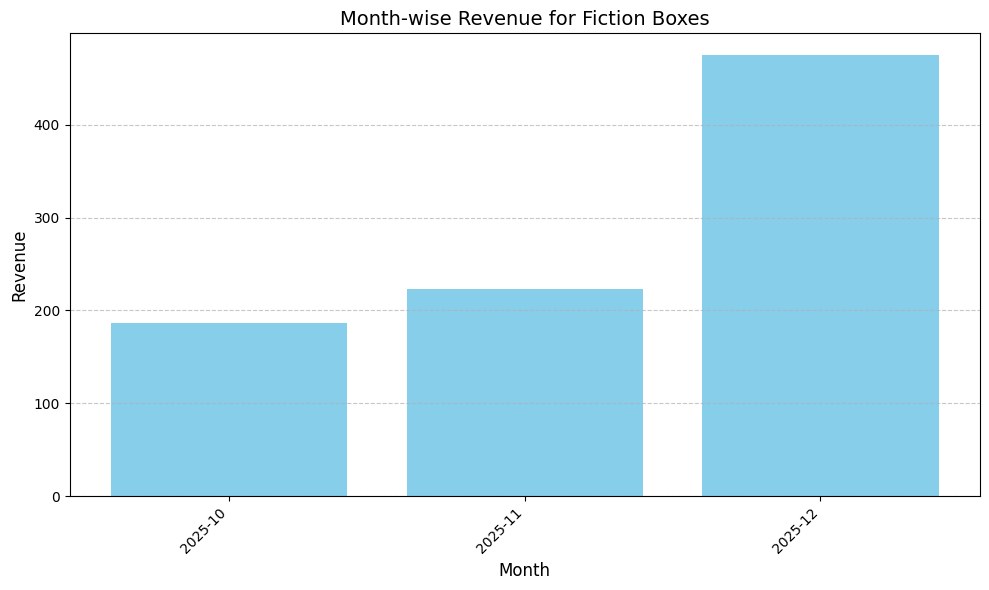

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(month_revenue['Month'], month_revenue['Revenue'], color='skyblue')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.title("Month-wise Revenue for Fiction Boxes", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
fiction_subs = subs[subs['sku'] == FICTION_SKU].copy()
fiction_subs['cohort_month'] = fiction_subs['created_at'].dt.to_period('M').astype(str)
fiction_subs['cancelled'] = fiction_subs['status'].str.lower().str.contains('cancel')

cohort = fiction_subs.groupby('cohort_month')['cancelled'].mean().reset_index()
cohort.rename(columns={'cancelled': 'Cancellation Rate'}, inplace=True)

cohort

,cohort_month,Cancellation Rate
0,2025-10,0.636364
1,2025-11,0.250000
2,2025-12,0.235294


***Earlier cohorts show cancellation rates going lower indicating improvement in customer engagement.***

**Top 2 Selling Products & Underperforming Products**

In [11]:
full_data = subs.merge(
    charges,
    left_on="subscription_id",
    right_on="line_item_subscription_id",
    how="inner"
)

product_revenue = full_data.groupby(['sku', 'product_title'])['total_price'].sum().reset_index()
product_revenue = product_revenue.sort_values(by='total_price', ascending=False)

product_revenue

,sku,product_title,total_price
32,ABOS3HORRORPLUS,Horror Plus,3200.62
15,ABOS2HORRORPLUS,Horror Plus,1320.11
7,ABOS2CMT|SUB,"Crime, Mystery & Thriller Book Box",952.76
33,ABOS4BYOB,Build Your Own Book Box,918.43
42,ABOS4CMT|SUB,"Crime, Mystery & Thriller Book Box",865.98
...,...,...,...
10,ABOS2FICTION,Fiction Box - Box of 2 Surprise Books,12.99
17,ABOS2KIDS-BN,Surprise kids Book Subscription Box,11.66
20,ABOS2KIDS-GA,Surprise kids Book Subscription Box,0.00
21,ABOS2KIDS-GF,Surprise kids Book Subscription Box,0.00


In [12]:
top_2_products = product_revenue.head(2)
top_2_products

,sku,product_title,total_price
32,ABOS3HORRORPLUS,Horror Plus,3200.62
15,ABOS2HORRORPLUS,Horror Plus,1320.11


In [13]:
underperforming_products = product_revenue.tail(2)
underperforming_products

,sku,product_title,total_price
21,ABOS2KIDS-GF,Surprise kids Book Subscription Box,0.0
45,ABOS4FICTION|SUB,Surprise Box of Four Books,0.0
